# Data Prepration

## 1. Text data prepration

Here we are going to extract the relavant information and one-hot-encod them.

In [1]:
# Importing the libraries
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the labels
labels = pd.read_csv("./dataset/text dataset/CXR8-selected/Data_Entry_2017.csv")
labels.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [3]:
# Getting the relavant information
labels = labels[['Image Index', 'Finding Labels']]
labels.head()

,Image Index,Finding Labels
0,00000001_000.png,Cardiomegaly
1,00000001_001.png,Cardiomegaly|Emphysema
2,00000001_002.png,Cardiomegaly|Effusion
3,00000002_000.png,No Finding
4,00000003_000.png,Hernia


In [17]:
# Getting the unique values in labels
labels['Finding Labels'].value_counts()

No Finding                                                                    60361
Infiltration                                                                   9547
Atelectasis                                                                    4215
Effusion                                                                       3955
Nodule                                                                         2705
Pneumothorax                                                                   2194
Mass                                                                           2139
Effusion|Infiltration                                                          1603
Atelectasis|Infiltration                                                       1350
Consolidation                                                                  1310
Atelectasis|Effusion                                                           1165
Pleural_Thickening                                                          

In [4]:
# Adding label columns
disease = ["No Finding", "Infiltration", "Atelectasis", "Effusion", "Nodule", "Pneumothorax", "Mass", "Consolidation", 
           "Pleural_Thickening", "Cardiomegaly", "Emphysema", "Fibrosis", "Edema", "Pneumonia"]

for i_disease in disease:
    labels[i_disease] = 0
    
labels.head()

,Image Index,Finding Labels,No Finding,Infiltration,Atelectasis,Effusion,Nodule,Pneumothorax,Mass,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Fibrosis,Edema,Pneumonia,Hernia
0,00000001_000.png,Cardiomegaly,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00000002_000.png,No Finding,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# Adding 1 if the patient has a disease
for index, i_labels in enumerate(labels['Finding Labels']):
    for l in i_labels.split("|"):
        labels[l][index] = 1
        
labels.head()

,Image Index,Finding Labels,No Finding,Infiltration,Atelectasis,Effusion,Nodule,Pneumothorax,Mass,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Fibrosis,Edema,Pneumonia,Hernia
0,00000001_000.png,Cardiomegaly,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,00000002_000.png,No Finding,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
# Saving the dataset
labels.to_csv("./dataset/text dataset/dataset.csv")

In [107]:
# Loading the dataset
labels = pd.read_csv("./dataset/text dataset/dataset.csv")
labels = labels.drop("Unnamed: 0", axis = 1)

In [108]:
labels.head()

,Image Index,Finding Labels,No Finding,Infiltration,Atelectasis,Effusion,Nodule,Pneumothorax,Mass,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Fibrosis,Edema,Pneumonia,Hernia
0,00000001_000.png,Cardiomegaly,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,00000001_001.png,Cardiomegaly|Emphysema,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,00000001_002.png,Cardiomegaly|Effusion,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,00000002_000.png,No Finding,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,Hernia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## 2. Image data prepration

Applying data augmention in order to have a uniformly distrubuted dataset among diffrent classes. The goal is to have minimum of 15K images per class with having a at least 300 images deviation.

In [6]:
# Getting the number of images per class
for i_disease in disease:
    print(i_disease + ":", sum(labels[i_disease]))

No Finding: 60361
Infiltration: 19894
Atelectasis: 11559
Effusion: 13317
Nodule: 6331
Pneumothorax: 5302
Mass: 5782
Consolidation: 4667
Pleural_Thickening: 3385
Cardiomegaly: 2776
Emphysema: 2516
Fibrosis: 1686
Edema: 2303
Pneumonia: 1431
Hernia: 227


###  Fliping and rotating image

Here we are going to make 8 diffrent version of an image by flipping and rotation the image in the following directions.

<img src = "./assets/augmented_example.png" style = "height:210px">

In [8]:
# Importing the libraries
import cv2
import pandas as pd
import os
import glob
from shutil import copyfile
from PIL import Image
from keras.preprocessing import image 
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def flip_and_rotate_img(image):
    augmented_images = []

    # Appending image itself
    augmented_images.append(image)

    # Rotating image to 90, 180, 270 and appending them
    rows,cols = image.shape[:2]
    for i_angle in [90, 180, 270]:
        M = cv2.getRotationMatrix2D((cols/2, rows/2), i_angle, 1)
        dst = cv2.warpAffine(image, M, (cols, rows))  
        augmented_images.append(dst)

    # First flipping and then rotating the image to 90, 180, 270 and appending them
    flipped_image = cv2.flip(image, 1)
    augmented_images.append(flipped_image)

    rows,cols = flipped_image.shape[:2]
    for i_angle in [90, 180, 270]:
        M = cv2.getRotationMatrix2D((cols/2, rows/2), i_angle, 1)
        dst = cv2.warpAffine(flipped_image, M, (cols, rows))  
        augmented_images.append(dst)
    return augmented_images

In [10]:
def flip_and_rotate_img_savnig_to_dir(image_pixels, image_name = "00001-", output_dir = "./folder_to_be_deleted/"):
    
    # Rotating image to 90, 180, 270 and appending them
    rows,cols = image_pixels.shape[:2]
    for i_angle in [90, 180, 270]:
        M = cv2.getRotationMatrix2D((cols/2, rows/2), i_angle, 1)
        dst = cv2.warpAffine(image_pixels, M, (cols, rows))  
        # Converting numpy array to image pil
        image = Image.fromarray(dst.astype('uint8'), 'RGB')
        image.save(output_dir + image_name + "_" + str(i_angle) + "degree" + ".jpg")

    # First flipping and then rotating the image to 90, 180, 270 and appending them
    flipped_image = cv2.flip(image_pixels, 1)
    # Converting numpy array to image pil
    image = Image.fromarray(flipped_image.astype('uint8'), 'RGB')
    image.save(output_dir + image_name + "_" + "flipped.jpg")

    rows,cols = flipped_image.shape[:2]
    for i_angle in [90, 180, 270]:
        M = cv2.getRotationMatrix2D((cols/2, rows/2), i_angle, 1)
        dst = cv2.warpAffine(flipped_image, M, (cols, rows))  
        # Converting numpy array to image pil
        image = Image.fromarray(dst.astype('uint8'), 'RGB')
        image.save(output_dir + image_name + "_" + "flipped" + "_" + str(i_angle) +"degree" + ".jpg")

In [11]:
os.listdir("./dataset/image dataset")

['.DS_Store',
 'augmented_images',
 'images 1',
 'images 10',
 'images 11',
 'images 2',
 'images 3',
 'images 4',
 'images 5',
 'images 6',
 'images 7',
 'images 8',
 'images 9']

In [12]:
# Getting the name of images for "Infiltration", "Atelectasis", "Effusion", "Pneumothorax"
img_names = labels[labels['Finding Labels'] == "Infiltration"]['Image Index']
infiltration_img_name = list(img_names)

# Getting the name of images for "Infiltration", "Atelectasis", "Effusion", "Pneumothorax"
img_names = labels[labels['Finding Labels'] == "Atelectasis"]['Image Index']
atelectasis_img_name = list(img_names)

# Getting the name of images for "Infiltration", "Atelectasis", "Effusion", "Pneumothorax"
img_names = labels[labels['Finding Labels'] == "Effusion"]['Image Index']
effusion_img_name = list(img_names)

# Getting the name of images for "Infiltration", "Atelectasis", "Effusion", "Pneumothorax"
img_names = labels[labels['Finding Labels'] == "Pneumothorax"]['Image Index']
pneumothorax_img_name = list(img_names)

In [17]:
os.listdir("./dataset/image dataset/augmented_images")

['.DS_Store', 'atelectasis', 'effusion', 'infiltration', 'pneumothorax']

In [18]:
def aumenting_image(path, output_dir):
    # Loading the image
    img = image.load_img(path, target_size=(512, 512))
    # Converting the image to array
    x = image.img_to_array(img)
    # Getting the image name
    image_name = path.split('/')[-1].split('.')[0]
    # Augmenting the image
    flip_and_rotate_img_savnig_to_dir(x, image_name, output_dir)

In [19]:
# Augmenting infiltration images
for i_folder in os.listdir("./dataset/image dataset/"):
    # Not considering two folders
    if (i_folder == ".DS_Store") or (i_folder == "augmented_images"):
        continue
    # Augmenting
    for i_img in os.listdir("./dataset/image dataset/" + i_folder):
        if i_img in infiltration_img_name:
            aumenting_image(path = "./dataset/image dataset/" + i_folder + "/" + i_img, 
                            output_dir = "./dataset/image dataset/augmented_images/infiltration/")

In [20]:
# Augmenting atelectasis images
for i_folder in os.listdir("./dataset/image dataset/"):
    if (i_folder == ".DS_Store") or (i_folder == "augmented_images"):
        continue
    for i_img in os.listdir("./dataset/image dataset/" + i_folder):
        if i_img in atelectasis_img_name:
            aumenting_image(path = "./dataset/image dataset/" + i_folder + "/" + i_img, 
                            output_dir = "./dataset/image dataset/augmented_images/atelectasis/")

In [21]:
# Augmenting effusion images
for i_folder in os.listdir("./dataset/image dataset/"):
    if (i_folder == ".DS_Store") or (i_folder == "augmented_images"):
        continue
    for i_img in os.listdir("./dataset/image dataset/" + i_folder):
        if i_img in effusion_img_name:
            aumenting_image(path = "./dataset/image dataset/" + i_folder + "/" + i_img, 
                            output_dir = "./dataset/image dataset/augmented_images/effusion/")

In [22]:
# Augmenting pneumothorax images
for i_folder in os.listdir("./dataset/image dataset/"):
    if (i_folder == ".DS_Store") or (i_folder == "augmented_images"):
        continue
    for i_img in os.listdir("./dataset/image dataset/" + i_folder):
        if i_img in pneumothorax_img_name:
            aumenting_image(path = "./dataset/image dataset/" + i_folder + "/" + i_img, 
                            output_dir = "./dataset/image dataset/augmented_images/pneumothorax/")

## 3. Getting labels for the augmented images

In [109]:
# Dropping "Finding Labels" labels
labels = labels.drop(labels = "Finding Labels", axis = 1)
labels.head()

,Image Index,No Finding,Infiltration,Atelectasis,Effusion,Nodule,Pneumothorax,Mass,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Fibrosis,Edema,Pneumonia,Hernia
0,00000001_000.png,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,00000001_001.png,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
2,00000001_002.png,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,00000002_000.png,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,00000003_000.png,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [110]:
for i_img in os.listdir("./dataset/image dataset/augmented_images/infiltration"):
    if i_img == ".DS_Store":
        continue
    labels = labels.append({"Image Index": i_img, "Infiltration": 1.}, ignore_index = True)

In [111]:
labels.iloc[-50:, :]

,Image Index,No Finding,Infiltration,Atelectasis,Effusion,Nodule,Pneumothorax,Mass,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Fibrosis,Edema,Pneumonia,Hernia
174013,00028148_001_flipped_90degree.jpg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174014,00028148_018_180degree.jpg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174015,00028148_018_270degree.jpg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174016,00028148_018_90degree.jpg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174017,00028148_018_flipped.jpg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174018,00028148_018_flipped_180degree.jpg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174019,00028148_018_flipped_270degree.jpg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174020,00028148_018_flipped_90degree.jpg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174021,00028154_000_180degree.jpg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174022,00028154_000_270degree.jpg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
for i_img in os.listdir("./dataset/image dataset/augmented_images/atelectasis"):
    if i_img == ".DS_Store":
        continue
    labels = labels.append({"Image Index": i_img, "Atelectasis": 1.}, ignore_index = True)

In [113]:
labels.iloc[-50:, :]

,Image Index,No Finding,Infiltration,Atelectasis,Effusion,Nodule,Pneumothorax,Mass,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Fibrosis,Edema,Pneumonia,Hernia
201929,00027963_000_flipped_90degree.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201930,00028007_000_180degree.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201931,00028007_000_270degree.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201932,00028007_000_90degree.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201933,00028007_000_flipped.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201934,00028007_000_flipped_180degree.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201935,00028007_000_flipped_270degree.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201936,00028007_000_flipped_90degree.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201937,00028014_002_180degree.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201938,00028014_002_270degree.jpg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
for i_img in os.listdir("./dataset/image dataset/augmented_images/effusion"):
    if i_img == ".DS_Store":
        continue
    labels = labels.append({"Image Index": i_img, "Effusion": 1.}, ignore_index = True)

In [115]:
labels.iloc[-50:, :]

,Image Index,No Finding,Infiltration,Atelectasis,Effusion,Nodule,Pneumothorax,Mass,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Fibrosis,Edema,Pneumonia,Hernia
227745,00027982_000_flipped_90degree.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227746,00028013_004_180degree.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227747,00028013_004_270degree.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227748,00028013_004_90degree.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227749,00028013_004_flipped.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227750,00028013_004_flipped_180degree.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227751,00028013_004_flipped_270degree.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227752,00028013_004_flipped_90degree.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227753,00028013_010_180degree.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227754,00028013_010_270degree.jpg,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
for i_img in os.listdir("./dataset/image dataset/augmented_images/pneumothorax"):
    if i_img == ".DS_Store":
        continue
    labels = labels.append({"Image Index": i_img, "Pneumothorax": 1.}, ignore_index = True)

In [117]:
labels.iloc[-50:, :]

,Image Index,No Finding,Infiltration,Atelectasis,Effusion,Nodule,Pneumothorax,Mass,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Fibrosis,Edema,Pneumonia,Hernia
255577,rotated15_00027937_001_flipped_90degree.jpg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255578,rotated15_00027971_000_180degree.jpg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255579,rotated15_00027971_000_270degree.jpg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255580,rotated15_00027971_000_90degree.jpg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255581,rotated15_00027971_000_flipped.jpg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255582,rotated15_00027971_000_flipped_180degree.jpg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255583,rotated15_00027971_000_flipped_270degree.jpg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255584,rotated15_00027971_000_flipped_90degree.jpg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255585,rotated15_00028065_000_180degree.jpg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255586,rotated15_00028065_000_270degree.jpg,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
labels.columns[1:]

Index(['No Finding', 'Infiltration', 'Atelectasis', 'Effusion', 'Nodule',
       'Pneumothorax', 'Mass', 'Consolidation', 'Pleural_Thickening',
       'Cardiomegaly', 'Emphysema', 'Fibrosis', 'Edema', 'Pneumonia',
       'Hernia'],
      dtype='object')

In [131]:
# Conveting "None" to 0
for i_column in labels.columns[1:]:
    labels[i_column].replace(np.nan, 0, inplace=True)

In [132]:
labels.head()

,Image Index,No Finding,Infiltration,Atelectasis,Effusion,Nodule,Pneumothorax,Mass,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Fibrosis,Edema,Pneumonia,Hernia
0,00000001_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,00000001_002.png,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [133]:
# Saving the labels
labels.to_csv("./dataset/text dataset/dataset_with_augmentation.csv")

In [134]:
# Loading the labels
labels = pd.read_csv("./dataset/text dataset/dataset_with_augmentation.csv")
labels = labels.drop("Unnamed: 0", axis = 1)

In [135]:
labels

,Image Index,No Finding,Infiltration,Atelectasis,Effusion,Nodule,Pneumothorax,Mass,Consolidation,Pleural_Thickening,Cardiomegaly,Emphysema,Fibrosis,Edema,Pneumonia,Hernia
0,00000001_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,00000001_002.png,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,00000002_000.png,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00000003_000.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,00000003_001.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,00000003_002.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,00000003_003.png,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,00000003_004.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,00000003_005.png,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [136]:
# Getting the number of images per class
for i_disease in disease:
    print(i_disease + ":", sum(labels[i_disease]))

No Finding: 60361.0
Infiltration: 81837.0
Atelectasis: 39475.0
Effusion: 39133.0
Nodule: 6331.0
Pneumothorax: 33134.0
Mass: 5782.0
Consolidation: 4667.0
Pleural_Thickening: 3385.0
Cardiomegaly: 2776.0
Emphysema: 2516.0
Fibrosis: 1686.0
Edema: 2303.0
Pneumonia: 1431.0
Hernia: 227.0


In [143]:
labels = labels.drop(labels = ['Nodule', 'Mass', 'Consolidation', 'Pleural_Thickening', 'Cardiomegaly',
                               'Emphysema', 'Fibrosis', 'Edema', 'Pneumonia', 'Hernia'], axis = 1)

In [144]:
labels.head()

,Image Index,No Finding,Infiltration,Atelectasis,Effusion,Pneumothorax
0,00000001_000.png,0.0,0.0,0.0,0.0,0.0
1,00000001_001.png,0.0,0.0,0.0,0.0,0.0
2,00000001_002.png,0.0,0.0,0.0,1.0,0.0
3,00000002_000.png,1.0,0.0,0.0,0.0,0.0
4,00000003_000.png,0.0,0.0,0.0,0.0,0.0


In [145]:
# Saving the labels
labels.to_csv("./dataset/text dataset/dataset_with_augmentation.csv")

In [146]:
# Loading the labels
labels = pd.read_csv("./dataset/text dataset/dataset_with_augmentation.csv")
labels = labels.drop("Unnamed: 0", axis = 1)

## 4. Further augmentation

In [148]:
import glob

In [99]:
labels.columns[1:]

Index(['No Finding', 'Infiltration', 'Atelectasis', 'Effusion',
       'Pneumothorax'],
      dtype='object')

In [147]:
# Getting the number of images per class
for i_disease in labels.columns[1:]:
    print(i_disease + ":", sum(labels[i_disease]))

No Finding: 60361.0
Infiltration: 81837.0
Atelectasis: 39475.0
Effusion: 39133.0
Pneumothorax: 33134.0


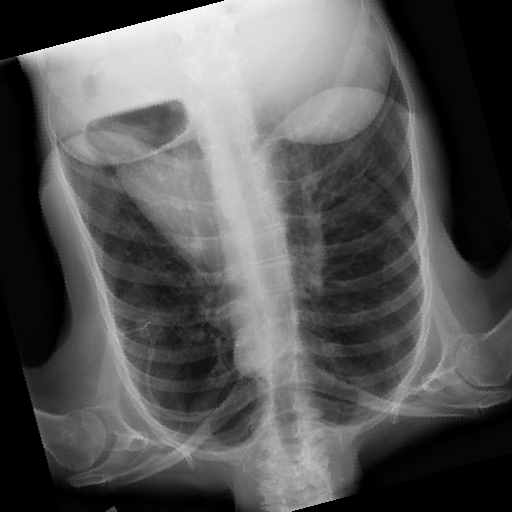

In [101]:
from PIL import Image
im = Image.open("./dataset/image dataset/augmented_images/infiltration/00000005_006_180degree.jpg")
img = im.rotate(15)
img
#img.save("./ss.jpg")

In [103]:
# Getting the list of image names
pneumothorax_names = []
for i_image in os.listdir("./dataset/image dataset/augmented_images/Pneumothorax/"):
    pneumothorax_names.append(i_image)

In [137]:
len(pneumothorax_names)

13916

In [106]:
for i_image in pneumothorax_names:
    im = Image.open("./dataset/image dataset/augmented_images/Pneumothorax/" + i_image)
    img = im.rotate(15)
    img.save("./dataset/image dataset/augmented_images/Pneumothorax/" + "rotated15_" + i_image)

In [150]:
len(glob.glob("./dataset/image dataset/augmented_images/Pneumothorax/*"))

27832